<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/ex1_sol_ds_sal_stat_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Solution for the exercise 1, lecture 1
#
# Kaggle Dataset link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

import pandas as pd
# pandas cheatsheet
# https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

# take the data from the file
data = pd.read_csv("ds_salaries.csv", delimiter=",")
# conveder the data into dataframe
ds_sal=pd.DataFrame(data)
#

print(ds_sal.head(4))

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S 

In [ ]:
# Task-1: find the average salary for Data Scientists at Senior level (average salary in Euro)
import numpy as np
# numnpy cheatsheet:
# https://assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

# Take the correct column from the dataframe
#print (ds_sal['salary'])
ds_sn = ds_sal[(ds_sal['experience_level']=='SE') & (ds_sal['job_title']=='Data Scientist') & (ds_sal['salary_currency']=='EUR')]

# And from the new dataframe take only the salary column
ds_sn_sal = ds_sn['salary']

# Convert to list and then to array. These operations can be done direclty in one shot using
# "to_array()" pandas method, but in this case we did in few steps just for fun.
ds_sn_sal_li = []
ds_sn_sal_li = ds_sn_sal.values.tolist()
ds_sn_sal_ar = np.array(ds_sn_sal_li)

# Calculate the average of the array 
avg_1 = np.mean(ds_sn_sal_ar)

# Could have been also 
sum_v = 0.0; avg_v = 0.0

for i in ds_sn_sal_ar:
    sum_v += i

avg_2 = sum_v/len(ds_sn_sal_ar)

# Could have been also 
avg_3 = ds_sn_sal.mean()

print('Average salary calculated from array = ',avg_1)
print('Average salary calculated with a loop = ',avg_2)
print('Average salary calculated directly with pandas = ',avg_3)

Average salary calculated from array =  62680.0
Average salary calculated with a loop =  62680.0
Average salary calculated directly with pandas =  62680.0


<BarContainer object of 3 artists>

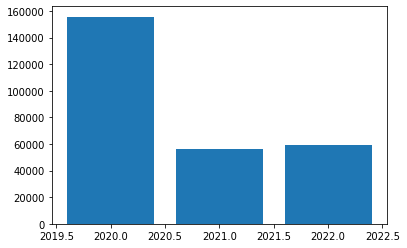

In [ ]:
# Task-2: visualise the salary trend for a Data Analyst of EN level, for 2020, 2021, 2022.

da_sn20 = ds_sal[(ds_sal['job_title']=='Data Analyst') & (ds_sal['experience_level']=='EN') & (ds_sal['work_year']== 2020)]
da_sn20_sal = da_sn20['salary']
da_sn21 = ds_sal[(ds_sal['job_title']=='Data Analyst') & (ds_sal['experience_level']=='EN') & (ds_sal['work_year']== 2021)]
da_sn21_sal = da_sn21['salary']
da_sn22 = ds_sal[(ds_sal['job_title']=='Data Analyst') & (ds_sal['experience_level']=='EN') & (ds_sal['work_year']== 2022)]
da_sn22_sal = da_sn22['salary']

# convert the data found into lists
da_sn20_l = da_sn20_sal.values.tolist()
# convert than into arrays
da_sn20_ar = np.array(da_sn20_l)
# calculate the mean
avg20 = np.mean(da_sn20_ar)

da_sn21_l = da_sn21_sal.values.tolist()
da_sn21_ar = np.array(da_sn21_l)
avg21 = np.mean(da_sn21_ar)

da_sn22_l = da_sn22_sal.values.tolist()
da_sn22_ar = np.array(da_sn22_l)
avg22 = np.mean(da_sn22_ar)

# an example of simple plot
import matplotlib.pyplot as plt
# Matplotlip cheatsheet
# https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png

# put in the horizontal axis the years and in the average values
plt.bar([2020, 2021, 2022],[avg20, avg21, avg22])


In [ ]:
# Task-3: substitute all the Data Analyst figures (identified as "Data Analyist" in the job_title column) 
# salaries with NaN values for 2021. 

num_rows = len(ds_sal.index)

# We could copy the dataframe
ds_sal_nan = ds_sal

for i in range(num_rows):
    if ((ds_sal.iloc[i,4] == 'Data Analyst') and (ds_sal.iloc[i,1]==2021)):
        ds_sal_nan.iloc[i,5] = np.nan 
        ds_sal_nan.iloc[i,7] = np.nan 

# Check if this worked by saving the file and checking it
ds_sal_nan.to_csv("data2.csv")


In [ ]:
# Task-4: substitute the NaN values of the previous task with an averaged value between 2020 and 2022.
# Try to use the same work for the average values (e.g. Data Analyst MI level nan salary should be
# substituted with an Data Analyst salary value, averaged between 2020 and 2022 at the same Data Analyst).
# Note that not all the figures are present in the dataset and this can be a problem 
# (e.g. ML Engineer MI level can be in 2021 but not in 2020). In this case you could try to substitute it with a random
# value that could not be far from the actual one.

# ML Engineer 2020 dafarame
df_DA_20 = ds_sal_nan[(ds_sal_nan['job_title'] == "Data Analyst") & (ds_sal_nan['work_year'] == 2020)]
# ML Engineer 2022 dafarame
df_DA_22 = ds_sal_nan[(ds_sal_nan['job_title'] == "Data Analyst") & (ds_sal_nan['work_year'] == 2022)]

# we put all salareis them in a list
df_DA_y_l = []; df_DA_y_l.append(df_DA_20); df_DA_y_l.append(df_DA_22)



# We know from the dataset that the expertise levels are four: EN, MI, SE, EX. 
# firstily we can try to see wich data we have, given the current data set:
#
# averaged salary list with two dimensions where to place the results.
#
avg_sal_l = [[],[]];

# experience level list
exl_l = ['EN','MI','SE','EX']

# dataframes list
#
df_count = 0

for df_DA_y in df_DA_y_l:
    # average salary per year list

    avg_sal_y_l = []
    # for each single level of expertise
    for wl in exl_l:
        print('########################Data from from External Loop####################################################')
        print (df_DA_y)
        print('#####################FILTERED LIST based on Internal Loop#######################################################')
        print (df_DA_y[df_DA_y['experience_level'] == wl])
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        #wait = input("Press Enter to continue.")
        # for each experience level in the wl_l we create a dataframe
        df_DA_wl = df_DA_y[df_DA_y['experience_level'] == wl]
        # convert the salary values into a list wl_sa_l
        wl_sa_l = df_DA_wl['salary_in_usd'].values.tolist()
        # make the averaged value and append it to avg_sal_y_l
        # in this list there are the average salary of each level but only for 2020 or 2022
        avg_sal_y_l.append(np.around(np.mean(np.array(wl_sa_l))))
    # once the list avg_sal_y_l is full put it in avg_sal_l list
    # so we create a list of lists, which contains the average salaries list for 2020 and 2022
    avg_sal_l[df_count] = avg_sal_y_l
    avg_sal_y = []
    df_count += 1

# The final value list has two NaN because there is no indication of SE and EX salary in the original 
# dataframe. In this case you can complete the list in the way you think is better, for example, making 
# making a resarch on web on the data. For example in US the salary is  $97,814 and $106,500 for SE and # EX levels respectively. 

avg_sal_l[0][2] = 97814.0; avg_sal_l[0][3] = 106500.0

# averaged list of values for 2021
avg_sal_21_l = []

# calculate the mean value between 2020 and 2022 and write the results in the list.
# The list contains at the end the everage values of salary for a Data Analyst for each level of expetise
# That is why is a list with four values inside, one for each level 

for i in range(4):
    avg_sal_21_l.append(np.mean([avg_sal_l[0][i], avg_sal_l[1][i]]))

# We now need to insert the resulting values in the dataframe, firstly we can copy the dataframe 
# to not lose it.

ds_sal_fixed = ds_sal_nan

# list of indexes list from the dataset for the Data Analyst we need to fix
# We create a list with the number of the rows where we expect a NaN because is 
# Data Analyst row 
index_l = []
# 
for exl in exl_l:
    index_l.append(ds_sal_fixed[(ds_sal_fixed['experience_level'] == exl) & 
    (ds_sal_fixed['job_title'] == 'Data Analyst') & 
    (ds_sal_fixed['work_year'] == 2021)].index.tolist())



# From the list of index we see that we have 
index_level = 0
usd_sal_col = 7

# for each index reporting the job expertise level
for ind_l in index_l:
    # for each element of that indexes list
    for ind in ind_l:
        # change each NaN in 2021 usd salary column
        ds_sal_fixed.iloc[ind, usd_sal_col] = avg_sal_21_l[index_level]
        if ds_sal_fixed.iloc[ind, usd_sal_col - 1] == 'EUR':
            ds_sal_fixed.iloc[ind, usd_sal_col - 2] = 0.98 * avg_sal_21_l[index_level]
        elif ds_sal_fixed.iloc[ind, usd_sal_col - 1] == 'CAD':
            ds_sal_fixed.iloc[ind, usd_sal_col - 2] = 1.29 * avg_sal_21_l[index_level]
        elif ds_sal_fixed.iloc[ind, usd_sal_col - 1] == 'USD':
            ds_sal_fixed.iloc[ind, usd_sal_col - 2] = avg_sal_21_l[index_level]
        elif ds_sal_fixed.iloc[ind, usd_sal_col - 1] == 'GBP':
            ds_sal_fixed.iloc[ind, usd_sal_col - 2] = 0.83 * avg_sal_21_l[index_level]
    index_level += 1
#
ds_sal_fixed.to_csv('ds_sal_fixed.csv')

# The result is quite aproximative, because we simply averaged the salaries from diverse countries, but we 
# filled the data again using pandas and python.


#################################################################################
    Unnamed: 0  work_year experience_level employment_type     job_title  \
5            5       2020               EN              FT  Data Analyst   
14          14       2020               MI              FT  Data Analyst   
15          15       2020               MI              FT  Data Analyst   
34          34       2020               MI              FT  Data Analyst   
38          38       2020               EN              FT  Data Analyst   
50          50       2020               EN              FT  Data Analyst   
51          51       2020               EN              FT  Data Analyst   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
5    72000.0             USD        72000.0                 US           100   
14   85000.0             USD        85000.0                 US           100   
15    8000.0             USD         8000.0                 PK       

KeyboardInterrupt: ignored